# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем нужные нам библитеки для анализа данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as plt

#### Откроем файл с данными. В параметрах укажем путь и разделитель '\t'. Выведем первые 5 строк таблицы.

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### С помощью метода info() и describe () изучим информацию в таблице.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe().astype('int64')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


**Вывод:** по выведенным данным, мы видим, что в таблице:
- 23699 строки и 22 столбца.
- Есть столбцы, которые названы не по формату, нужно будет изменить.
- В большей части столбцов (14/21) присутствуют пропуски, их нужно проверить и заменить.
- Стоит проверить правильность типов данных.


#### С помощью метода hist() выведем данные в виде гистограмм. 

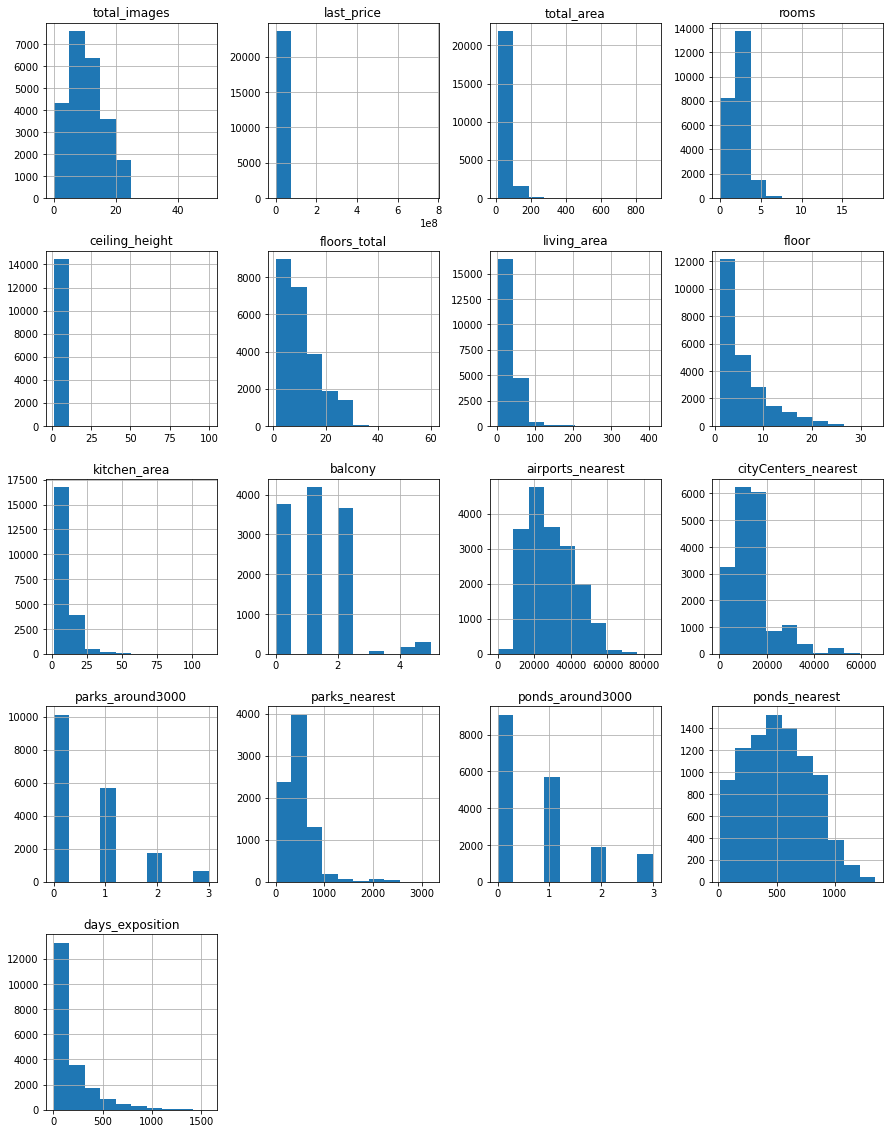

In [5]:
data.hist(figsize=(15,20));

**Вывод:** с помощью функции hist() было выведено 17 гистограмм на разные виды данных. По ним тяжело что-то сказать, так как данные еще не были преобработаны, поэтому метрики могут быть неточными.

### Предобработка данных

#### Предобработка данных в столбце 'total_images'.

1. Для наглядности выведем столбец 'total_images'.

In [6]:
data['total_images']

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

In [7]:
data['total_images'].isna().sum()

0

**Вывод:** по выведенном столбцу мы можем понять, что в столбце отсутствуют пропуски, тип данных - int64 (для этого столбца правильный тип).

2. Проверим на выбросы с помощью метода unique().

In [8]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

**Вывод:** по выведенном массиву, мы видим, что в данных нет аномалий, данные в порядке.

#### Предобработка данных в столбце 'last_price'

1. Для наглядности выведем столбец 'last_price'.

In [9]:
data['last_price']

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

In [10]:
data['last_price'].isna().sum()

0

**Вывод:** по столбцу видно, что пропусков нет, но указан тип данных: float64, по столбцу мы видим, что все данные без остатка, а значит можно изменить столбец на тип данных - int64.

2. Изменим тип данных данного столбца на 'int64' с помощью метода astype().

In [11]:
data['last_price'] = data['last_price'].astype('int64')

In [12]:
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

3. В данном столбце трудно будет найти аномалии, так как квартиры могут стоить по разному. НО проверим, есть ли цены, по значениям ниже нуля.

In [13]:
data[data['last_price'] < 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Предобработка данных в столбце 'total_area'.

1. Для наглядности выведем весь столбец, чтобы понять, что из себя представляют данные. 

In [14]:
data['total_area']

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

In [15]:
data['total_area'].describe().astype('float64')

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Вывод:** мы видим, что столбец имеет все строки, значит пропусков нет, слишком маленьких значений не наблюдается. Тип данных - float64 выбран правильно.

2. Проверим, есть ли в данных аномалии с помощью метода describe(). (Метод unique() не подходит, так как выводит все значения, трудно будет увидеть в столбце аномалии).

In [16]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Вывод:** по выведенным данным, мы видим, что минимальная площадь - 12 м^2, максимальная - 900 м^2. Эти данные являются адекватными, в столбце нет аномалий.

#### Предобработка данных в столбце 'first_day_exposition'.

1. Для наглядности выведем весь столбец, чтобы понять, что из себя представляют данные. 

In [17]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [18]:
data['last_price'].isna().sum()

0

**Вывод:** мы видим, что пропусков в столбце нет, но неправильно указан тип данных. В этом столбце указаны даты, а тип данных - object. 

2. Изменим тип данных столбца: object -> datetime64.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

#### Предобработка данных в столбце 'rooms'.

1. Для наглядности данных, выведем весь столбец.

In [21]:
data['rooms']

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

In [22]:
data['rooms'].isna().sum()

0

**Вывод:** мы видим, что пропущенных строк нет -> пропуски отсутствуют. Тип данных выбран правильно.

2. С помощью метода describe() проанализируем данные в столбце.

In [23]:
data['rooms'].describe().astype('int64')

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

**Вывод:** по выведенным данным, можно заметить, что максимальное число комнат в квартире - 19, а минимальное - 0. Если в квартире 0 комнат, скорей всего, это студия или апартаменты с открытой планировкой.

In [24]:
data[data['rooms'] == 0].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23.00,2016-09-27,0,NaN,27.0,18.00,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


**Вывод:** Так как в таблице есть значения 'is_apartment', 'studio', 'open_plan', на данном этапе, пока что, не будем изменять данные, где количество комнат равно 0.

#### Предобработка данных в столбце 'ceiling_height'.

1. Для наглядности данных, выведем все значения в столбце.

In [25]:
data['ceiling_height'].head(30)

0     2.70
1      NaN
2      NaN
3      NaN
4     3.03
5      NaN
6      NaN
7      NaN
8      NaN
9     2.50
10    2.67
11     NaN
12     NaN
13    2.56
14     NaN
15     NaN
16    3.05
17     NaN
18    2.50
19    2.75
20    2.70
21     NaN
22    2.75
23    2.60
24     NaN
25    2.75
26     NaN
27    2.60
28    2.90
29     NaN
Name: ceiling_height, dtype: float64

In [26]:
data['ceiling_height'].isna().sum()

9195

**Вывод:** мы видим, что в данном столбце 9195 пропусков, тип данных указан правильно - float64. Такое большое количество пропусков, скорей всего, связано с тем, что продавец не указал данный параметр в объявление.

2. Из-за того, что пропущенных значений большое количество, удалять строки - нельзя, так как это серьезно повляет на результат анализа данных. Поэтому, там, где нет значений, произведем замену на значение медианы всего столбца.

In [27]:
data['ceiling_height'].median() # Определение медианы столбца.

2.65

In [28]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

3. Также, данный столбец, нужно проверить на аномалии, так как потолки не могут быть слишком высокие и низкие, с помощью метода describe (), узнаем максимальное и минимальное значение.

In [29]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

**Вывод:** минимальное значение потолков - 1 метр, максимальное - 100 метров. Мы понимаем, что это явно выбросы и их нужно заменить.

4. По информации из интернета, регламентировано, что минимальная высота потолка должна быть не менее 2.5 метров. По максимальной высоте критериев нет, но возьмем максимум - 10 метров. По данным видно, что в некоторых значениях ошибка - значения чересчур большие, поэтому мы значения, котоырые больше 10 метров разделим на 10. После обработки значения, которые не попали в данный интервал - заменим на медиану.

In [30]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
data['ceiling_height'].describe().astype('float64')

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [31]:
data['ceiling_height'].median() # Определение медианы значений.

2.65

In [32]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.65 # Если значение меньше 2.5 - заменяем на медиану.

In [33]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = 2.65# Если значение больше 10 - заменяем на медиану.

In [34]:
data['ceiling_height'].describe().astype('float64')

count    23699.000000
mean         2.698693
std          0.230854
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

**Вывод:** в столбце 'ceiling_height' пропуски, аномалии, были заменены на медиану.

#### Предобработка данных в столбце 'floors_total'.

1. Для наглядности выведем все значения столбца, а также общую информацию.

In [35]:
data['floors_total']

0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23699, dtype: float64

In [36]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод:** по выведенным данным, мы можем понять, что в столбце присуствуют пропуски, указан неправильный тип данных.

2. Просмотрим, с чем связаны пропуски.

In [37]:
data[data['floors_total'].isna()] # Выводим строки, в которых пропущено значение в столбце 'floors_total'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


**Вывод:** по выбранным данным нельзя точно сказать об этажности дома, поэтому оставим значения данного столбца без изменения. 

#### Предобработка данных в  столбце 'living_area'.

1. Для наглядности выведем основную информацию данного столбца.

In [38]:
data['living_area']

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64

In [39]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [40]:
data['living_area'].isna().sum()

1903

**Вывод:** по выведенным данным, мы можем понять, что в столбце присутствуют пропуски, аномалии, а тип данных указан правильно.

In [41]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000,32.80,2018-02-19,1,2.65,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000,40.00,2018-11-18,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12.0,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000,88.00,2018-01-12,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000,45.60,2018-02-08,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000,35.00,2017-12-08,1,2.65,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


2. По информации из интернета, 6 м^2 - необходимая минимальная жилая площадь в квартире. Те значения, которые меньше 6 метров, предлагаю заменить на пропуск, так как определенное значение мы не можем указать.

In [42]:
data[data['living_area'] < 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000,41.0,2017-07-02,1,2.65,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000,52.0,2018-02-06,2,3.00,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2680000,22.0,2018-08-11,0,2.65,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000,23.0,2018-01-01,0,2.65,24.0,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6100000,77.6,2019-02-28,4,2.50,9.0,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64990000,139.0,2015-11-24,3,3.00,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [43]:
data.loc[data['living_area'] < 6, 'living_area'] = None

In [44]:
data[data['living_area'] < 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


3. Пропуски заменять не будем, оставим так, как есть. Мы не можем указать среднее/медиану, потому что у каждой квартиры общая площадь разная.

#### Предобработка данных в столбце 'floor'.

1. Для наглядности выведем основную информацию данного столбца.

In [45]:
data['floor']

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23699, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [47]:
data['floor'].describe().astype('int64')

count    23699
mean         5
std          4
min          1
25%          2
50%          4
75%          8
max         33
Name: floor, dtype: int64

**Вывод:** в данном столбце данные корректны.

#### Предобработка данных в столбце 'is_apartment'.

1. Для наглядности выведем основную информацию данного столбца.

In [48]:
data['is_apartment']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23699, dtype: object

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [50]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Вывод:** из выведенных данных, мы можем увидеть, что столбец представляет из себя булевый тип данных (True / False), но в нём есть пропуски, которые мы можем заменить на False - квартира не является апартаментами. 

2. Заменим пропуски на значение 'False'.

In [51]:
data['is_apartment'] = data['is_apartment'].fillna(False)

3. Изменим тип данных object -> bool.

In [52]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Предобработка данных в столбце 'studio'.

1. Для наглядности выведем основную информацию данного столбца.

In [54]:
data['studio']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: studio, Length: 23699, dtype: bool

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [56]:
data['studio'].unique()

array([False,  True])

**Вывод:** данный столбце корректен.

#### Предобработка данных в столбце 'open_plan'.

1. Для наглядности выведем основную информацию данного столбца.

In [57]:
data['open_plan']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: open_plan, Length: 23699, dtype: bool

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [59]:
data['open_plan'].unique()

array([False,  True])

**Вывод:** данный столбце корректен.

#### Предобработка данных в столбце 'kitchen_area'.

1. Для наглядности выведем основную информацию данного столбца.

In [60]:
data['kitchen_area']

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

In [61]:
data['kitchen_area'].agg(['min', 'max', 'mean', 'median'])

min         1.300000
max       112.000000
mean       10.569807
median      9.100000
Name: kitchen_area, dtype: float64

In [62]:
data[data['kitchen_area'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
492,18,95000000,216.0,2017-12-05,4,3.00,5.0,86.00,4,False,False,False,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.00,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1085,16,75000000,323.0,2017-07-10,5,4.00,5.0,255.70,4,False,False,False,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
2489,9,12500000,255.0,2017-04-21,3,2.65,2.0,153.90,2,False,False,False,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
3117,19,140000000,631.0,2019-03-30,7,2.65,5.0,NaN,5,False,False,False,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3561,5,12300000,115.0,2017-08-09,3,2.70,20.0,45.00,16,False,False,False,60.0,1.0,Санкт-Петербург,33386.0,14234.0,0.0,NaN,0.0,NaN,63.0
4320,20,19700000,146.3,2017-02-10,3,3.40,6.0,55.80,6,False,False,False,56.2,NaN,Санкт-Петербург,23312.0,2450.0,1.0,548.0,3.0,883.0,638.0
4394,20,57000000,174.0,2015-11-09,3,3.20,10.0,95.00,6,False,False,False,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6.0,409.00,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
6021,19,16830000,117.4,2019-04-04,2,2.75,16.0,33.40,13,False,False,False,51.0,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN


**Вывод:** по выведенным данным, мы можем увидеть, что в столбце присутствуют пропуски, аномалии, связанные с минимальным значением площади, а тип данных указан верно.

2. По информации из интернета (СНиП), минимальная площадь кухни должна быть не менее 5 м^2. Значения, которые меньше этого требования заменим на медиану.

In [63]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = 9.1

In [64]:
data[data['kitchen_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


3. Заменим пропуски также медианным значением столбца.

In [65]:
data['kitchen_area'] = data['kitchen_area'].fillna(9.1)

In [66]:
data['kitchen_area'].isna().sum()

0

#### Предобработка данных в столбце 'balcony'.

1. Для наглядности выведем основную информацию данного столбца.

In [67]:
data['balcony']

0        NaN
1        2.0
2        0.0
3        0.0
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: balcony, Length: 23699, dtype: float64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [69]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

**Вывод:** из выведенных данных мы можем понять, что в столбце присутствуют пропуски, неправильно указан тип данных, аномалий нет.

2. По условия задания, если в данном столбце указан пропуск, то, скорей всего, в квартире нет балконов, поэтому заменим пропуски на 0.

In [70]:
data['balcony'] = data['balcony'].fillna(0)

In [71]:
data['balcony'].isna().sum()

0

3. Изменим тип данных float64 -> int64.

In [72]:
data['balcony'] = data['balcony'].astype('int64')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Предобработка данных в столбце 'locality_name'.

1. Для наглядности выведем основную информацию данного столбца.

In [74]:
data['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [75]:
data['locality_name'].isna().sum()

49

In [76]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Вывод:** в приведенных данных мы можем увидеть, что присутствуют пропуски, есть неявные дубликаты, тип данных указан верно.

2. Для определения дубликатов переведем все названия на нижний регистр.

In [77]:
data['locality_name'] = data['locality_name'].str.lower()

3. Слово 'поселок' заменим на 'посёлок'.

In [78]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

4. Заменяем неявные дубликаты.

In [79]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')

In [80]:
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')

In [81]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [82]:
data['locality_name'] = data['locality_name'].str.replace('посёлок мурино', 'мурино')

In [83]:
data['locality_name'] = data['locality_name'].str.replace('село никольское', 'никольское')

In [84]:
data['locality_name'] = data['locality_name'].str.replace('посёлок любань', 'любань')

In [85]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'посёлок янино-1',
       'посёлок парголово', 'мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'посёлок металлострой', 'посёлок лебяжье', 'посёлок сиверский',
       'посёлок молодцово', 'посёлок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок ефимовский', 'посёлок плодовое', 'деревня заклинье',
       'посёлок торковичи', 'посёлок первомайское', 'красное село',
       'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый 

**Вывод:** в приведенном столбце, были удалены неявные дубликаты. Пропуски мы оставляем, продавец не указал населённый пункт, заполнить другим значением мы не можем.

#### Предобработка данных в столбце 'airports_nearest'. 

1. Для наглядности выведем основную информацию данного столбца.

In [86]:
data['airports_nearest']

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

In [87]:
data['airports_nearest'].isna().sum()

5542

In [88]:
data['airports_nearest'].agg({'min', 'max', 'mean', 'median'})

mean      28793.672193
median    26726.000000
max       84869.000000
min           0.000000
Name: airports_nearest, dtype: float64

**Вывод:** по выведеннм данным мы можем сделать вывод, что в стобце есть пропуски, есть аномальные значения, тип данных указан верно. 

2. Минимальное расстояние до аэропорта равное 0 - аномальное значение, такого не может быть. Скорей всего, информация о расстоянии до аэропорта в объявление не указано, поэтому, значения в столбце равные нулю заменим на пропуск.

In [89]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [90]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


3. Пропуски в столбце мы никак не можем изменить или удалить, если мы добавим в них медианное / среднее значение, данные будут искажены.

#### Предобработка данных в столбце 'cityCenters_nearest'. 

1. В первую очередь, изменим название данного столбца на правильный формат названий.

In [91]:
data = data.rename(columns = {'cityCenters_nearest':'distance_city_center'})

In [92]:
data['distance_city_center']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: distance_city_center, Length: 23699, dtype: float64

2. Выведем основные данные об этом столбце.

In [93]:
data['distance_city_center'].agg({'min', 'max', 'mean', 'median'})

mean      14191.277833
median    13098.500000
max       65968.000000
min         181.000000
Name: distance_city_center, dtype: float64

In [94]:
data['distance_city_center'].isna().sum()

5519

**Вывод:** в данном столбце есть пропуски, которые мы не можем удалить/заменить, поэтому мы их так и оставляем. Аномалий в данных не наблюдается, тип данных выбран верно.

#### Предобработка данных в столбце 'parks_around3000'. 

1. В первую очередь изменим название на правильный формат.

In [95]:
data = data.rename(columns = {'parks_around3000':'parks_around'})

In [96]:
data['parks_around']

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around, Length: 23699, dtype: float64

2. Выведем основную информацию по данному столбцу.

In [97]:
data['parks_around'].agg({'min', 'max', 'mean', 'median'})

mean      0.611408
median    0.000000
max       3.000000
min       0.000000
Name: parks_around, dtype: float64

In [98]:
data['parks_around'].isna().sum()

5518

In [99]:
data['parks_around'].unique()

array([ 1.,  0.,  2., nan,  3.])

**Вывод:** по выведенным данном можем увидеть, что в столбце есть пропуски, аномалий нет, тип данных выбран неверно.

2. Вместо пропусков, поставим значение 0.

In [100]:
data['parks_around'] = data['parks_around'].fillna(0)

3. Изменим тип данных в столбце float64 -> int64.

In [101]:
data['parks_around'] = data['parks_around'].astype('int64')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21790 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Предобработка данных в столбце 'parks_nearest'. 

1. Для того, чтобы значение столбца было более понятным, изменим его название.

In [103]:
data = data.rename(columns = {'parks_nearest':'distance_to_parks'})

1. Выведем основную информацию о данном столбце.

In [104]:
data['distance_to_parks'].head(20)

0     482.0
1       NaN
2      90.0
3      84.0
4     112.0
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10    310.0
11      NaN
12      NaN
13    294.0
14      NaN
15    590.0
16    420.0
17      NaN
18    759.0
19      NaN
Name: distance_to_parks, dtype: float64

In [105]:
data['distance_to_parks'].agg({'min', 'max', 'mean', 'median'})

mean       490.804555
median     455.000000
max       3190.000000
min          1.000000
Name: distance_to_parks, dtype: float64

In [106]:
data['distance_to_parks'].isna().sum()

15620

**Вывод:** в данном столбце присутствуют пропуски, аномалий нет, тип данных выбран неправильно.

2. 15620 пропусков большое значение, возможна ошибка при выгрузке данных (Полагаемся на прошлый столбец). Предлагаю пропуски оставить без изменения, так как медианное значение серьезно изменит данные.

#### Предобработка данных в столбце 'ponds_around3000'. 

1. В первую очередь изменим название данного столбца на правильный формат.

In [107]:
data = data.rename(columns={'ponds_around3000':'ponds_around'})

2. Выведем основную информацию о столбце.

In [108]:
data['ponds_around'].head(5)

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
Name: ponds_around, dtype: float64

In [109]:
data['ponds_around'].agg({'min', 'max'})

max    3.0
min    0.0
Name: ponds_around, dtype: float64

In [110]:
data['ponds_around'].isna().sum()

5518

**Вывод:** в данном столбце есть пропуски, аномалий не наблюдается и неправильный тип данных.

3.  Скорей всего, пропуски обозначают, что поблизости нет водоёмов, поэтому можем заполнить пропуски значением 0.

In [111]:
data['ponds_around'] = data['ponds_around'].fillna(0)

4. Изменим тип данных float64 -> int64.

In [112]:
data['ponds_around'] = data['ponds_around'].astype('int64')

#### Предобработка данных в столбце 'ponds_nearest'. 

1. Для того, чтобы значение столбца было понятно, изменим название.

In [113]:
data = data.rename(columns={'ponds_nearest':'distance_to_ponds'})
data['distance_to_ponds']

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: distance_to_ponds, Length: 23699, dtype: float64

2. Выведем основную информацию.

In [114]:
data['distance_to_ponds'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: distance_to_ponds, dtype: float64

In [115]:
data['distance_to_ponds'].isna().sum()

14589

**Вывод:** в столбце присутствуют пропуски, аномалий нет, тип данных указан неверно.

3. Большой процент данных в данном столбце - пропуски. В близи 3км нет водоемов. Оставляем данные такими, какими они есть.

#### Предобработка данных в столбце 'days_exposition'. 

1. Выведем основную информацию о столбце.

In [116]:
data['days_exposition'].head()

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

In [117]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [118]:
data['days_exposition'].isna().sum()

3181

In [119]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,distance_city_center,parks_around,distance_to_parks,ponds_around,distance_to_ponds,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
44,13,5350000,40.00,2018-11-18,1,2.65,22.0,NaN,3,False,False,False,9.10,1,санкт-петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5200000,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,False,False,7.00,0,санкт-петербург,30011.0,12872.0,0,NaN,0,NaN,NaN
46,17,6600000,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,False,False,8.30,2,санкт-петербург,15114.0,12702.0,0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,False,False,15.60,0,санкт-петербург,11827.0,11459.0,0,NaN,0,NaN,NaN
23685,15,2490000,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,False,False,5.60,1,ломоносов,48393.0,51818.0,0,NaN,0,NaN,NaN
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,9.10,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN


**Вывод:** судя по выведенным данным, значения пропусков обозначают, что объявление квартиры до сих пор не снято с продажи.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра.

Необходимо вычислить стоимость одного квадратного метра квартиры. Для этого нужно цену квартиры разделить на общую площадь квартиры. Результат запишем в новый столбец 'price_of_metre'.

In [120]:
data['price_of_metre'] = data['last_price'] / data['total_area']

#### День недели публикации объявления.

Чтобы найти день недели публикации объявления, необходимо воспользоваться методом dt.weekday к столбцу с датой 'first_day_exposition', который выводит номера дней недели. Результат запишем в новый столбец 'weekday_exposition'.

In [121]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [122]:
data['weekday_exposition'].describe

<bound method NDFrame.describe of 0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_exposition, Length: 23699, dtype: int64>

In [123]:
data['weekday_exposition'] = data['weekday_exposition'].astype('int64')

#### Месяц публикации объявления.

Чтобы найти месяц публикации объявления, необходимо воспользоваться методом dt.month к столбцу с датой 'first_day_exposition', который выводит номера месяцев. Результат запишем в новый столбец 'month_exposition'.

In [124]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [125]:
data['month_exposition'] = data['month_exposition'].astype('int64')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,distance_city_center,parks_around,distance_to_parks,ponds_around,distance_to_ponds,days_exposition,price_of_metre,weekday_exposition,month_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.00,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,9.10,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490.845228,1,3
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542.372881,0,1
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,9.10,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091.710758,6,2
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,False,False,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511.400651,1,3


#### Год публикации объявления.

Чтобы найти год публикации объявления, необходимо воспользоваться методом dt.year к столбцу с датой 'first_day_exposition', который выводит год. Результат запишем в новый столбец 'year_exposition'.

In [126]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [127]:
data['year_exposition'] = data['year_exposition'].astype('int64')

#### Тип этажа квартиры.

1. Создаем новый столбец 'group_floors', в котором будут храниться данные из столбца 'floor'

In [128]:
data['group_floors'] = data['floor']

2. Если в строке столбца 'group_floors' = 1, то значение меняем на 'Первый'.

In [129]:
data.loc[data['group_floors'] == 1, 'group_floors'] = 'Первый'

3. Чтобы определить является ли этаж последний, поделим общее количество этажей в доме на этаж, на котором квартира. Если значение равно 1.

In [130]:
last_floor = data.query('floors_total/floor == 1')

4. Если значение равно 1, то заменяем его на 'Последний'

In [131]:
data.loc[last_floor.index, 'group_floors'] = 'Последний'

5. Если значение в столбце 'group_floors' - не 'Первый', и не 'Последний' -> меняем значение на 'Другой'.

In [132]:
data.loc[(data['group_floors'] != 'Первый') & (data['group_floors'] != 'Последний'), 'group_floors'] = 'Другой'

#### Расстояние до центра города в километрах.

Чтобы перевести значения из метров в километры, необходимо столбец 'distance_city_center' разделить на 1000. Чтобы округлить значения, необходимо воспользоваться методом round(). Результат запишем в новый столбец 'distance_city_center_metre'.

In [133]:
data['distance_city_center_km'] = data['distance_city_center'] / 1000
data['distance_city_center_km'] = data['distance_city_center_km'].round()

In [134]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,distance_city_center,parks_around,distance_to_parks,ponds_around,distance_to_ponds,days_exposition,price_of_metre,weekday_exposition,month_exposition,year_exposition,group_floors,distance_city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,9.10,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,посёлок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,Другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,посёлок парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,Другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,Другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.764777,2,5,2018,Другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,Другой,15.0


### Проведите исследовательский анализ данных

#### Общая площадь квартир.

Изобразим boxplot, чтобы увидеть медианное значение, ящик с усами разброса значений.

<AxesSubplot:>

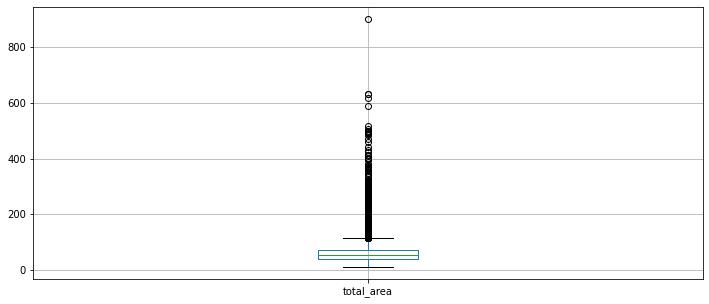

In [135]:
data.boxplot(column=['total_area'], figsize=(12,5), grid=True)


**Вывод:** мы видим, что большое количество выбросов значений. Поэтому сделаем срез значений, для того, чтобы лучше проанализировать данные.

In [136]:
good_data = data.query('total_area < 100')

<AxesSubplot:>

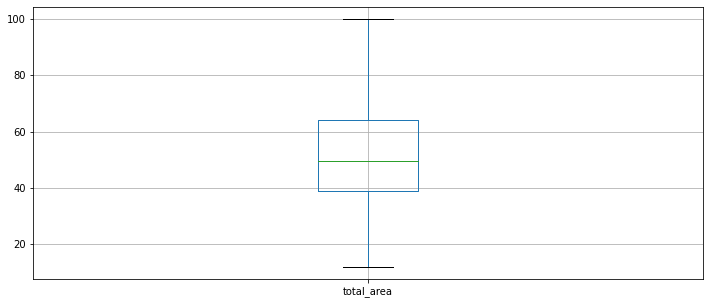

In [137]:
good_data.boxplot(column=['total_area'], figsize=(12,5))

In [138]:
good_data['total_area'].describe().astype('float64')

count    21791.000000
mean        52.773804
std         17.366386
min         12.000000
25%         39.000000
50%         49.700000
75%         64.000000
max         99.900000
Name: total_area, dtype: float64

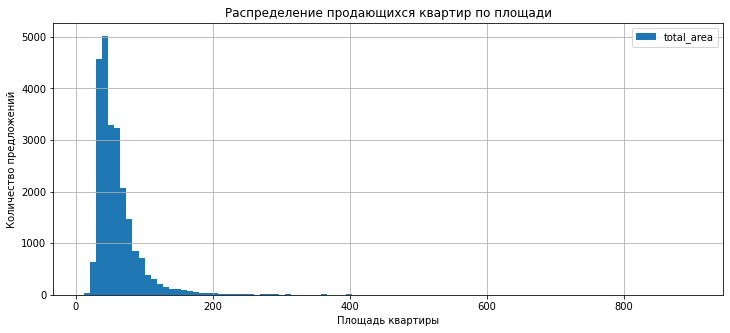

In [139]:
data.plot(kind='hist', y='total_area',title='Распределение продающихся квартир по площади',bins=100, figsize=(12,5), grid=True)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество предложений')
plt.show()

**Вывод:** по выведенной гистограмме мы можем сделать вывод, что в среднем площадь квартиры составляет от 40-50 м^2.

#### Жилая площадь.

1. Нарисуем boxplot для того, чтобы увидеть медиану и ящик с усами разброса.

<AxesSubplot:>

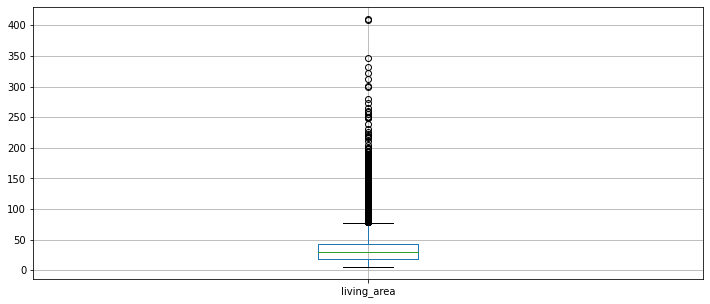

In [140]:
data.boxplot(column=['living_area'], figsize=(12,5), grid=True)

2. Нарисуем гистограмму.

<AxesSubplot:>

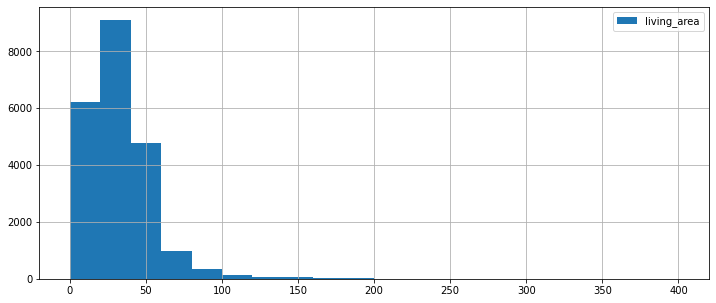

In [141]:
data['living_area'].hist(bins=20, range=(0,400), figsize=(12,5), legend = True)

In [142]:
data['living_area'].describe().astype('float64')

count    21790.000000
mean        34.466404
std         22.027437
min          6.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

**Вывод:** по построенной гистограмме видно, что большее число квартир имеют жилую площадь - 25-35 метров - больше 8000 квартир. 6-25 м^2 чуть меньше, но тоже занимают большую часть на рынке - около 6000 квартир. Дальше идут квартиры с жилой площадью больше 50 м^2.  

#### Площадь кухни.

1. Нарисуем boxplot для того, чтобы увидеть медиану и ящик с усами разброса.

<AxesSubplot:>

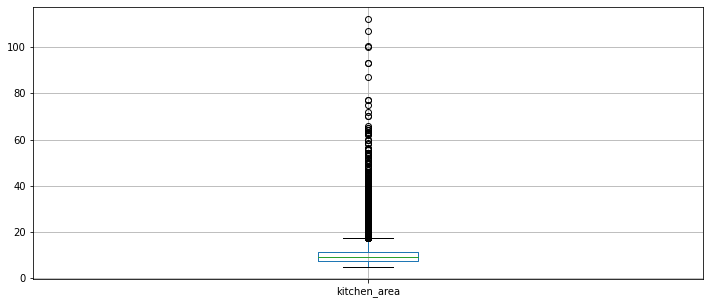

In [143]:
data.boxplot(column='kitchen_area', figsize=(12,5))

2. Нарисуем гистограмму, чтобы увидеть общую статистику.

In [144]:
data['kitchen_area'].describe().astype('float64')

count    23699.000000
mean        10.451139
std          5.615191
min          5.000000
25%          7.500000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

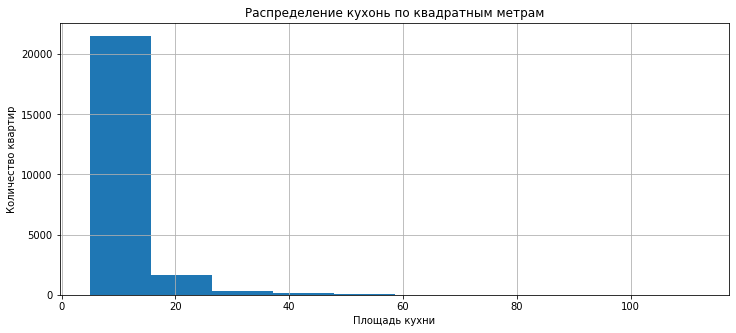

In [145]:
data['kitchen_area'].plot(kind='hist', figsize=(12,5), grid=True)
plt.title('Распределение кухонь по квадратным метрам')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')

**Вывод:** из выведенной гистограммы можно понять, что самое большое количество квартир продается с кухнями площадью около 10 м^2 - больше 20000 квартир. Дальше идут квартиры, имеющие кухню с площадью более 20, но их не так много.

#### Цена недвижимости.

1. Нарисуем boxplot для того, чтобы увидеть медиану и ящик с усами разброса.

<AxesSubplot:>

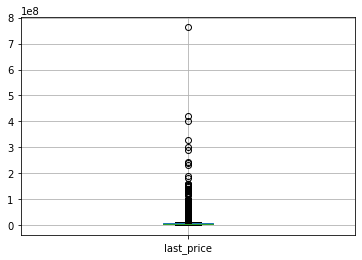

In [146]:
data.boxplot(column='last_price')

**Вывод:** по выведенному boxplot видно, что большое количество значений расположены за пределами усов.

In [147]:
data['last_price'].describe().astype('float64')

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

2. Сделаем срез данных, для того, чтобы анализ данных был более тщательный и сделаем повторный вывод boxplot.

In [148]:
good_data = data.query('last_price < 9000000')

<AxesSubplot:>

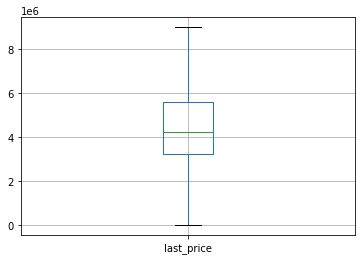

In [149]:
good_data.boxplot(column='last_price')

3. На основе этого среза, выведем гистограмму.

Text(0, 0.5, 'Количество квартир')

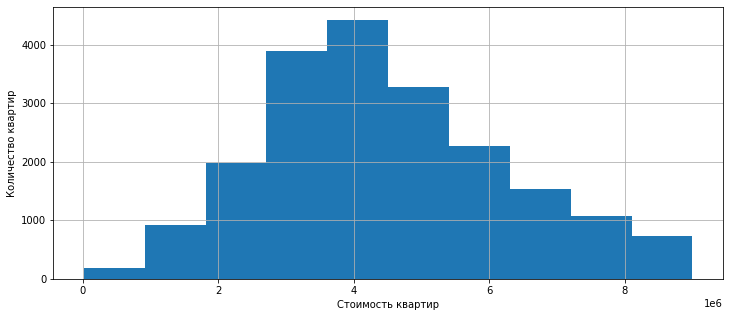

In [150]:
good_data['last_price'].plot(kind='hist', figsize=(12,5), grid=True)
plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир')

**Вывод**: из данной гистограммы мы можем увидеть, что большая часть квартир продается по цене 4 млн.рублей (чуть больше 4000 объявлений). На втором месте идут квартиры стоимостью около 3 млн. рублей (чуть меньше 4000 объявлений) и на третьем месте идут квартиры стоимостью около 5 млн. рублей (чуть больше 3000 объявлений)

#### Количество комнат.

1. Выведем уникальные значения данного столбца и выведем boxplot с усами и 'ящиком', для того чтобы, увидеть выбросы в данных.

In [151]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

<AxesSubplot:>

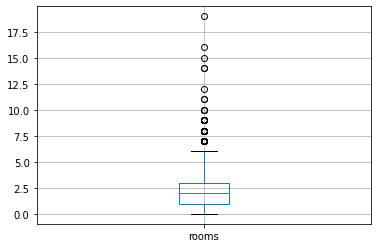

In [152]:
data.boxplot(column='rooms')

2. Мы видим, что после значения 5 на графике - выбросы, сделаем срез и оставим только значения от 0 до 5. Создаем новую переменную 'good_data', в которой будет храниться этот срез.

In [153]:
good_data = data.query('rooms < 9')

3. Выведем снова boxplot, но с переменной 'good_data', чтобы проверить на выбросы.

<AxesSubplot:>

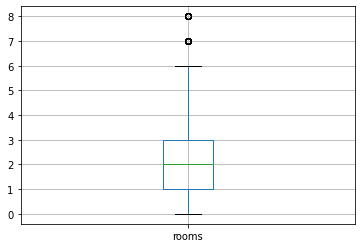

In [154]:
good_data.boxplot(column='rooms', grid=True)

4. Данные в boxplot в порядке, можем рисовать гистограмму.

Text(0, 0.5, 'Количество квартир на продаже')

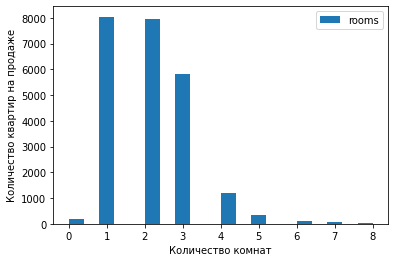

In [155]:
good_data.plot(kind='hist', y='rooms', bins=20)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир на продаже')

**Вывод:** из привиденной выше гистограммы, можем увидеть, что большинство квартир на продаже - однокомнатные или двухкомнатные квартиры. Далее идут трехкомнатные квартиры. Также, относительно не так много объявлений с квартирами имеющими 4 комнаты.

#### Высота потолков.

1. Для того, чтобы увидеть данные, который сильно отличаются от большинства - воспользуемся boxplot, который выводит 'ящик с усами'.

<AxesSubplot:>

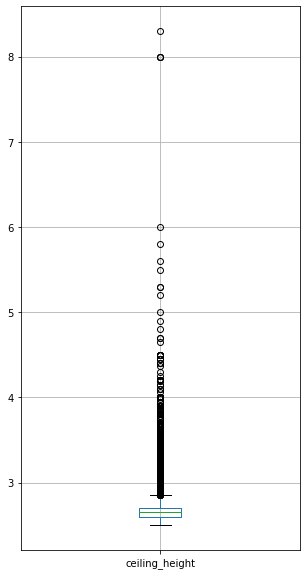

In [156]:
data.boxplot(column='ceiling_height', figsize=(5,10))

**Вывод:** мы видим, что значения, которые больше 2.7 - сильно отличаются от большинства данных, находящихся в пределах 'усов'. Их нужно устранить.

In [157]:
data['ceiling_height'].describe().astype('float64')

count    23699.000000
mean         2.698693
std          0.230854
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

2. Добавим в переменную 'good_data' срез - высота потолков должна не превышать - 2.7 метра. 

In [158]:
good_data = data.query('ceiling_height < 3.5')

<AxesSubplot:>

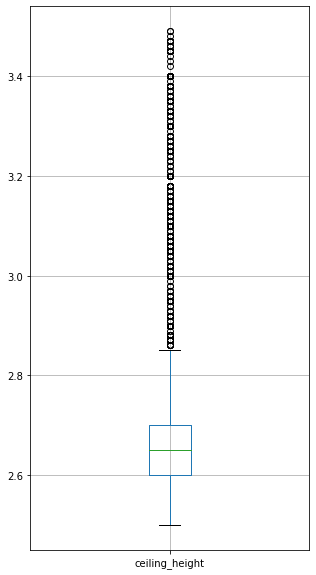

In [159]:
good_data.boxplot(column='ceiling_height', figsize=(5,10))

**Вывод:** мы видим, что данные в порядке, выбросов не так много.

3. На основе переменной 'good_data' - рисуем гистограмму.

Text(0, 0.5, 'Количество квартир на продаже')

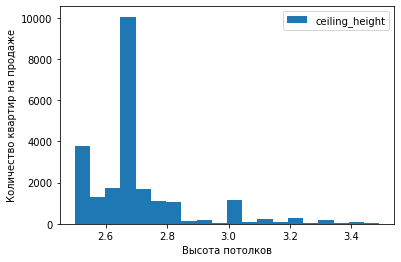

In [160]:
good_data.plot(kind='hist', y='ceiling_height', bins=20)
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир на продаже')

**Вывод:** по нарисованной гистограмме, можем понять, что большая часть квартир имеют высоту около 2.65 метра.

#### Этаж квартиры.

1. Выведем boxplot - 'ящик с усами', для того, чтобы увидеть размах значений и выявить выбросы из данных.

<AxesSubplot:>

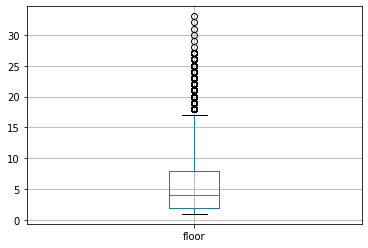

In [161]:
data.boxplot(column='floor')

2. Нарисуем гистограмму.

<AxesSubplot:ylabel='Frequency'>

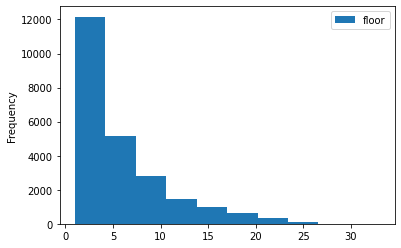

In [162]:
data.plot(kind='hist', y='floor')

**Вывод:** по выведенной гистограмме, мы видим, что большинство квартир продается 1-3 этаж. Возможно, это связано с тем, что на нижние этажи спрос ниже, поэтому квартиры дольше продаются и поэтому их больше в продаже. На втором месте по проценту идут квартиры расположенные на 5 этаже, далее на 10 и т.д.

In [163]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

#### Тип этажа квартиры.

1. Значения в данном столбце не в виде чисел. Поэтому мы воспользуемся методом pivot_table для того, чтобы создать сводную таблицу, в которой будет посчитано количество видов этажей каждого типа.

In [164]:
floor_pivot = data.pivot_table(values='floors_total', index='group_floors', aggfunc='count')
floor_pivot.columns = ['floors_count']
floor_pivot

,floors_count
group_floors,
Другой,17363
Первый,2889
Последний,3361


2. Изобразим boxplot, для того, чтобы увидеть размах - 'ящик с усами'.

<AxesSubplot:>

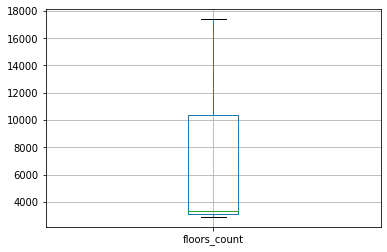

In [165]:
floor_pivot.boxplot(column='floors_count')

3. Видим, что данные в порядке, рисуем гистограмму в виде 'bar'.

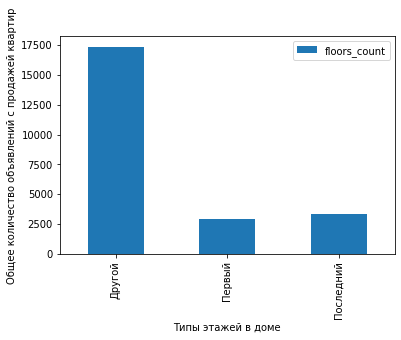

In [166]:
floor_pivot.plot(kind='bar')
plt.ylabel('Общее количество объявлений с продажей квартир')
plt.xlabel('Типы этажей в доме')
plt.show()

**Вывод:** по выведенному графику видно, тип этажей 'Другой' превосходит другие.

#### Общее количество этажей в доме.

1. Выведем boxplot - 'ящик с усами', для того, чтобы увидеть размах значений и выявить выбросы из данных.

<AxesSubplot:>

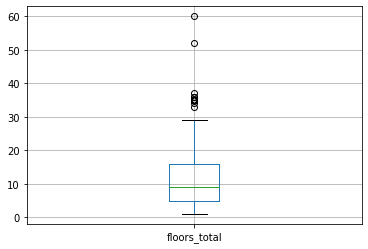

In [167]:
data.boxplot(column='floors_total')

2. Нарисуем гистограмму.

Text(0, 0.5, 'Общее количество объявлений с продажей квартир')

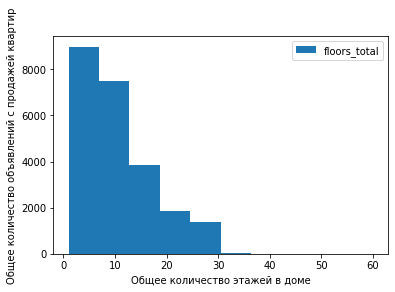

In [168]:
data.plot(kind='hist', y='floors_total')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Общее количество объявлений с продажей квартир')

In [169]:
data['floors_total'].describe().astype('float64')

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод:** по выведенным данным мы видим, что в среднем в домах около 5 этажей - самый высокий показатель в гистограмме. На втором месте по количеству квартир - дома с количеством этажей = 10.

#### Расстояние до центра города в метрах.

1. Выведем boxplot - 'ящик с усами', для того, чтобы увидеть размах значений и выявить выбросы из данных.

<AxesSubplot:>

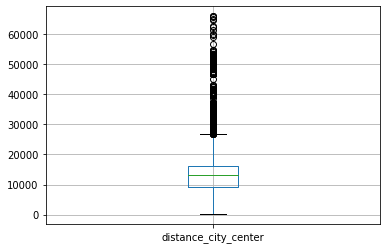

In [170]:
data.boxplot(column=('distance_city_center'))

2. Нарисуем гистограмму.

Text(0, 0.5, 'Общее количество объявлений с продажей квартир')

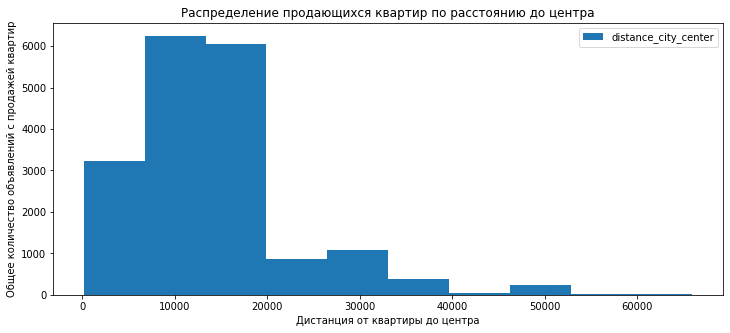

In [171]:
data.plot(kind='hist', y='distance_city_center', title='Распределение продающихся квартир по расстоянию до центра', figsize=(12,5))
plt.xlabel('Дистанция от квартиры до центра')
plt.ylabel('Общее количество объявлений с продажей квартир')

**Вывод:** по выведенным данным мы видим, что в среднем расстояние от квартиры до центра города около 10000-15000 метров или 10 и 15км.

#### Расстояние до ближайшего аэропорта.

1. Выведем boxplot - 'ящик с усами', для того, чтобы увидеть размах значений.

<AxesSubplot:>

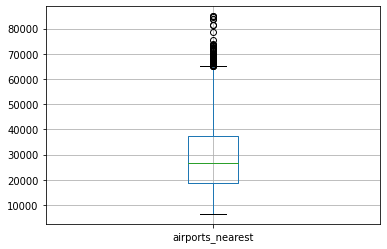

In [172]:
data.boxplot(column='airports_nearest')

2. Рисуем гистограмму.

Text(0, 0.5, 'Общее количество продающихся квартир')

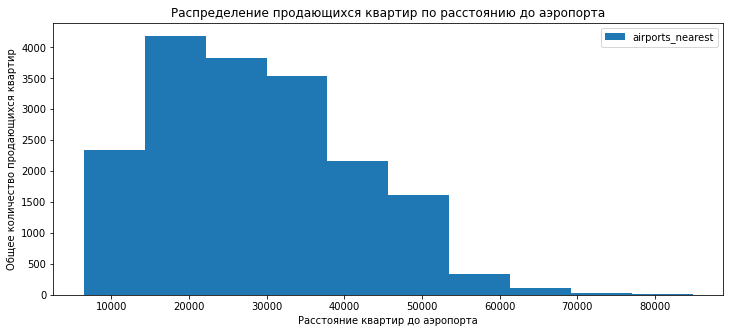

In [173]:
data.plot(kind='hist', y='airports_nearest', figsize=(12,5), title='Распределение продающихся квартир по расстоянию до аэропорта')
plt.xlabel('Расстояние квартир до аэропорта')
plt.ylabel('Общее количество продающихся квартир')

**Вывод:** по выведенной гистограмме видно, что в среднем квартиры расположены от аэропорта на расстоянии - 20000 метров. Но и 20000 и 30000 метров занимают существенное место на графике.

#### Расстояние до ближайшего парка.

1. Выведем boxplot - 'ящик с усами', для того, чтобы увидеть размах значений и выявить выбросы из данных.

In [174]:
data['distance_to_parks'].describe().astype('int64')

count    8079
mean      490
std       342
min         1
25%       288
50%       455
75%       612
max      3190
Name: distance_to_parks, dtype: int64

<AxesSubplot:>

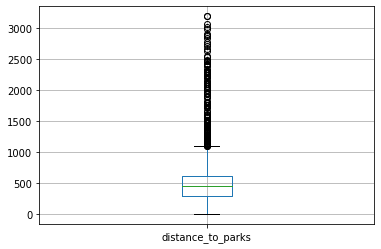

In [175]:
data.boxplot(column=('distance_to_parks'))

**Вывод:** в пункте 2.19 мы делали предобработку данных этого столбца и заметили, что большая часть данных пропущена. Это наводит нас на то, что данные, возможно, некорректны.

2. Выведем гистограмму.

<AxesSubplot:ylabel='Frequency'>

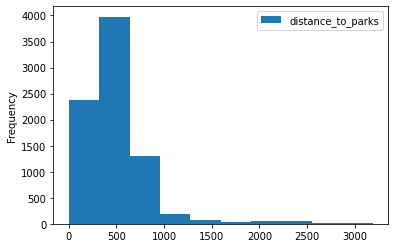

In [176]:
data.plot(kind='hist', y='distance_to_parks')

**Вывод:** по выведенной гистограмме заметно, что преимущественное значение - 500 метров до ближайшего парка. Также, довольно большое количество квартир находящихся очень близко к парку (0-500 метров).

#### День и месяц публикации объявления.

1. Данные столбца 'weekday_exposition' представляют из себя дни недели в виде чисел (0-6). Данный столбце не нужно проверять 'ящиком с усами'. Поэтому рисуем сразу же гистограмму.

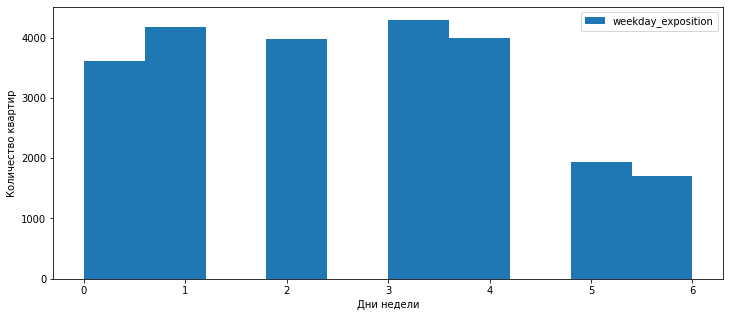

In [177]:
data.plot(kind='hist', y = 'weekday_exposition', figsize=(12,5))
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** по выведенной гистограмме мы видим, что чаще всего объявления публикуются по будням. По выходным, объявления публикуются не так активно, как в будни.

1. Данные столбца 'month_exposition' представляют из себя месяцы в виде чисел (1-12). Данный столбце не нужно проверять 'ящиком с усами'. Поэтому рисуем сразу же гистограмму.

Text(0, 0.5, 'Количество объявлений')

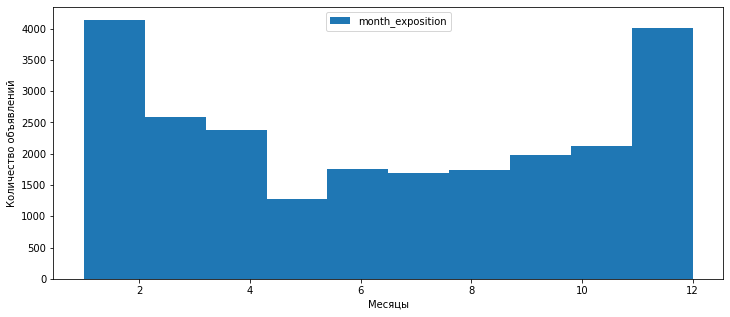

In [178]:
data.plot(kind='hist', y = 'month_exposition', figsize=(12,5))
plt.xlabel('Месяцы')
plt.ylabel('Количество объявлений')

**Вывод:** по выведенной гистограмме мы видим, что чаще всего объявления публикуются в начале (январь) или конце года (декабрь). Показатель публикации объявлений в другие месяца заметно ниже.

#### Как быстро продавались квартиры.

1. Для того, чтобы данные были более точными, необходимо определить размах. Для этого воспользуемся boxplot - 'ящик с усами'. 

<AxesSubplot:>

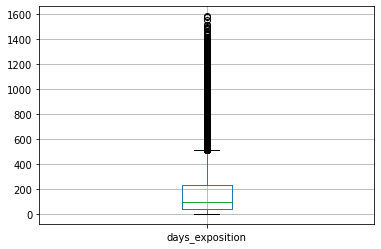

In [180]:
data.boxplot(column = ('days_exposition'))

2. Выведем общую информацию о данных.

In [181]:
data['days_exposition'].describe().astype('float64')

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [182]:
data['days_exposition'].median()

95.0

**Вывод:** по выведенной информации можно увидеть среднее арифметическое значение - 86 дней и медианное значение данных - 65 дней.

3. Рисуем гистограмму.

Text(0, 0.5, 'Количество квартир на продаже')

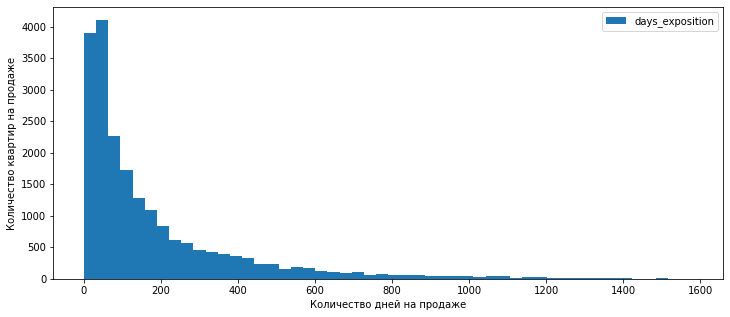

In [183]:
data.plot(y='days_exposition', kind='hist', figsize=(12,5), bins=50)
plt.xlabel('Количество дней на продаже')
plt.ylabel('Количество квартир на продаже')

**Вывод:** по выведенной гистограмме мы можем увидеть, что в среднем квартира продаётся за 2 месяца. Продажу квартиры можно назвать быстрой - если квартира была куплена меньше, чем за 1 месяц. Необычно долгими по продаже квартиры, можно назвать те, которые продавались дольше 260 дней (больше 8 месяцев).

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

1. Выведем все нужные нам для анализа данные.

In [184]:
data[['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'first_day_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition']].head(10)

,last_price,total_area,living_area,kitchen_area,rooms,floor,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,13000000,108.00,51.00,25.00,3,8,2019-03-07,3,3,2019
1,3350000,40.40,18.60,11.00,1,1,2018-12-04,1,12,2018
2,5196000,56.00,34.30,8.30,2,4,2015-08-20,3,8,2015
3,64900000,159.00,NaN,9.10,3,9,2015-07-24,4,7,2015
4,10000000,100.00,32.00,41.00,2,13,2018-06-19,1,6,2018
5,2890000,30.40,14.40,9.10,1,5,2018-09-10,0,9,2018
6,3700000,37.30,10.60,14.40,1,6,2017-11-02,3,11,2017
7,7915000,71.60,NaN,18.90,2,22,2019-04-18,3,4,2019
8,2900000,33.16,15.43,8.81,1,26,2018-05-23,2,5,2018
9,5400000,61.00,43.60,6.50,3,7,2017-02-26,6,2,2017


2. Поделим данные на несколько сводных таблиц. Первая таблица будет связана с площадями квартиры (общая, жилая, кухни). Вторая квартира будет связана с доп.характеристиками (комнаты, этаж). Третья таблица будет включать в себя данные, связанные с датой (день, месяц, год).

3.1. Создадим сводную таблицу, в которой будут значения, связанные с площадями.

In [185]:
table_area = pd.pivot_table(data, 
                            index='last_price', 
                            values=['total_area', 'living_area', 'kitchen_area'])
table_area.head(10)

,kitchen_area,living_area,total_area
last_price,,,
12190,40.500000,32.000000,109.000000
430000,7.550000,16.000000,42.200000
440000,9.100000,NaN,40.000000
450000,7.225000,23.533333,40.100000
470000,8.533333,30.000000,40.833333
480000,9.100000,16.000000,32.000000
490000,7.300000,17.000000,34.550000
500000,8.125000,21.033333,38.675000
520000,5.500000,18.000000,30.000000


3.2 Нарисуем график, в который будут входить данные из сводной таблицы по площадям.

<AxesSubplot:title={'center':'Зависимость площадей от стоимости квартиры'}, xlabel='Общая стоимость квартиры'>

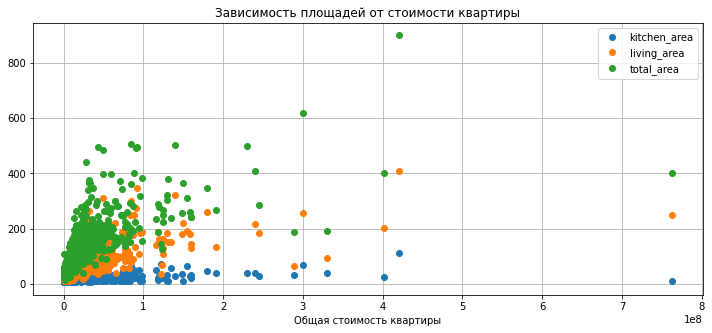

In [186]:
table_area.plot(style='o',grid=True, figsize=(12, 5), xlabel=('Общая стоимость квартиры'), title='Зависимость площадей от стоимости квартиры')

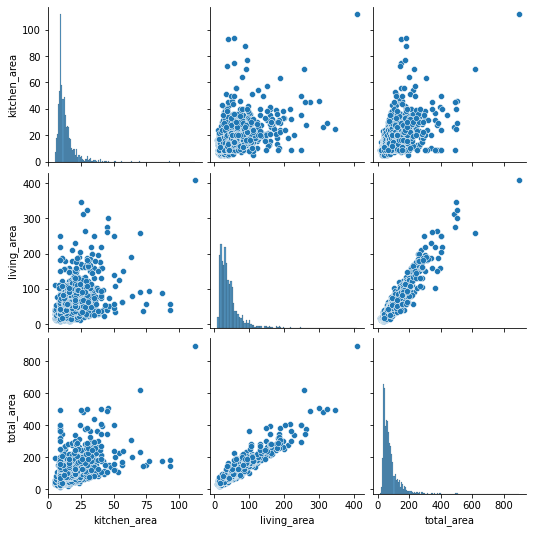

In [187]:
import seaborn as sns
palette = ['red']
sns.pairplot(table_area)
plt.show()

**Вывод:** по графикам мы видим, что все значения площадей коррелируют с общей стоимостью квартиры. Также, стоит подметить, что с ростом площадей, увеличивается стоимость квартиры, а значит коэффициент корреляции Пирсона будет положительным.

3.3 Узнаем коэффициент корреляции Пирсона каждой площади от стоимости квартиры.

In [188]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.653675,0.567318,0.440352
total_area,0.653675,1.000000,0.939958,0.568813
living_area,0.567318,0.939958,1.000000,0.419367
kitchen_area,0.440352,0.568813,0.419367,1.000000


**Вывод:** из выведенных данных мы видим, что самый большой коэффициент корреляции между общей площадью и стоимостью квартиры, составляет около 0.65, по шкале Чаддока - заметный показатель. А следовательно, если общая площадь коррелирует со стоимостью, то и другие площади будут коррелировать, но чуть меньше.

4.1 Создадим сводную таблицу, связанную с этажом и количеством комнат.

In [189]:
table_extra = pd.pivot_table(data, 
                            index='last_price', 
                            values=['rooms', 'floor'])
table_extra.head(10)

,floor,rooms
last_price,,
12190,25.000000,2.000000
430000,2.000000,1.500000
440000,1.000000,1.000000
450000,2.250000,1.750000
470000,2.666667,1.333333
480000,1.000000,1.000000
490000,4.000000,1.000000
500000,2.500000,1.250000
520000,1.000000,1.000000


4.2 По этой сводной таблице изобразим график.

<AxesSubplot:xlabel='last_price'>

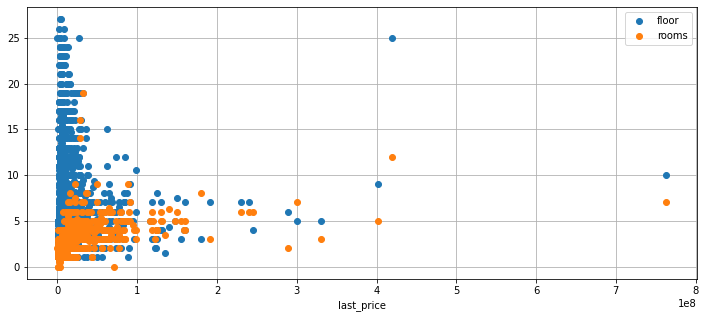

In [190]:
table_extra.plot(style='o',grid=True, figsize=(12, 5))

**Вывод:** по выведенному графику видно, что количество комнат коррелирует со стоимостью квартиры. А вот зависимость, этажа квартиры и стоимости практические не прослеживается.

4.3 Узнаем коэффициент корреляции Пирсона каждой площади от стоимости квартиры.

In [191]:
data['last_price'].corr(data['rooms'])

0.3633428499648948

In [192]:
data['last_price'].corr(data['floor'])

0.0265756432844708

**Вывод:** по выведенным данным мы можем понять, что корреляция между количеством комнат и стоимостью есть, но она не такая высокая, по шкале Чаддока показатель относится к умеренной зависимости. А показатель этажа практически не коррелирует со стоимостью квартиры, зависимость очень слабая, можно сказать, её нет.

5.1 Создадим сводную таблицу, связанную с днём и стоимостью квартиры.

In [193]:
table_day = pd.pivot_table(data,
                           index='weekday_exposition',
                           values=['last_price'])

5.2 По этой сводной таблице изобразим график.

<AxesSubplot:title={'center':'Зависимость цены от дня размещения'}, xlabel='weekday_exposition'>

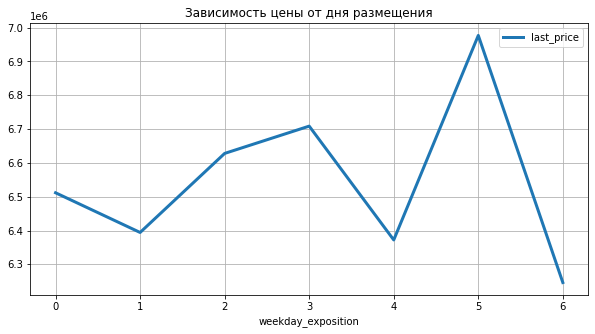

In [194]:
table_day.plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от дня размещения')

**Вывод:** по выведенному графику видно, что объявления с самыми высокими ценами за квартиру публикуются в субботу, а с самыми низкими - в воскресенье.

5.3 Создадим сводную таблицу, связанную с месяцем и стоимостью квартиры.

In [195]:
table_month = pd.pivot_table(data,
                           index='month_exposition',
                           values='last_price')

5.4 По этой сводной таблице изобразим график.

<AxesSubplot:title={'center':'Зависимость цены от месяца размещения'}, xlabel='month_exposition'>

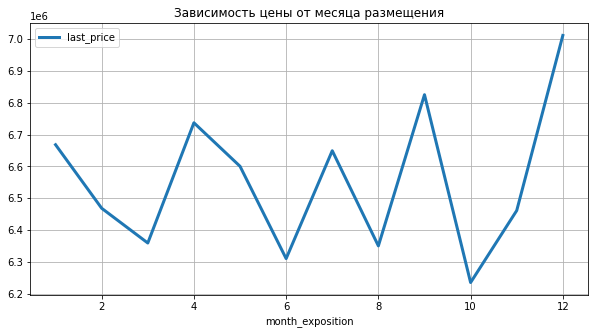

In [196]:
table_month.plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')

**Вывод:** по выведенному графику видно, что стоимость квартир повышается к декабрю. Заметное падение цен происходит в ноябре.

5.5 Создадим сводную таблицу, связанную с годом и стоимостью квартиры.

In [197]:
table_year = pd.pivot_table(data,
                           index='year_exposition',
                           values='last_price')

5.6 По этой сводной таблице изобразим график.

<AxesSubplot:title={'center':'Зависимость цены от года размещения'}, xlabel='year_exposition'>

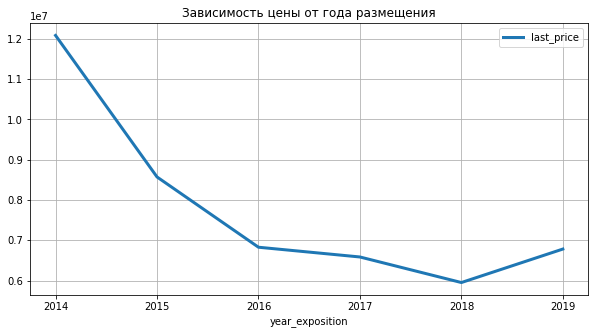

In [198]:
table_year.plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от года размещения')

**Вывод:** по выведенному графику видно, что с 2014-2018 годы цены на квартиры падают, но начиная с 2019 стоимость квартир по рынку начинает расти.

#### Cреднюю цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

1. Создадим сводную таблицу, в которой будут изображены - топ 10 населенных пунктов с наибольшим числом объявлений.

In [202]:
top_towns = pd.pivot_table(data,
                          index='locality_name',
                           values='total_area',
                          aggfunc='count')
top_towns.columns = ['count_ads']
top_towns = top_towns.sort_values(by='count_ads',ascending=False).head(10)
top_towns

,count_ads
locality_name,
санкт-петербург,15721
мурино,590
посёлок шушары,440
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307
деревня кудрово,299


**Вывод:** по выведенным данным, можно заменить, что большая часть объявлений - продажа квартир в Санкт-Петербурге.

2. Для того, чтобы найти цену одного квадратного метра, первое, что необходимо сделать - в таблице 'data' прогруппировать по названию населенного пункта и цену за квадратный метр, а также вывести среднее значение.

In [203]:
mean_price_of_metre = data.groupby('locality_name')['price_of_metre'].mean()

3. Объединим таблицу 'top_towns' и 'mean_price_of_metre' по столбцу 'locality_name'. После чего, для наглядности, изменим название столбца, который будет показывать среднее значение за квадратный метр в каждом населенном пункте.

In [204]:
merged_table = pd.merge(top_towns, mean_price_of_metre, on='locality_name')
merged_table = merged_table.rename(columns={'price_of_metre':'mean_price_of_metre'})
merged_table.sort_values(by='mean_price_of_metre', ascending=False)

,count_ads,mean_price_of_metre
locality_name,,
санкт-петербург,15721,114849.008794
пушкин,369,103125.819291
деревня кудрово,299,92473.547576
посёлок парголово,327,90175.913458
мурино,590,86087.512050
посёлок шушары,440,78677.364217
колпино,338,75424.579098
гатчина,307,68746.146763
всеволожск,398,68654.473986


**Вывод:** по выведенной таблице видно, что в Санкт-Петербурге больше всего объявлений и среднее значение за квадратный метр выше, чем в других населенных пунктах.

4. Создадим сводную таблицу, в которой будет изображен только столбец 'locality_name' и 'mean_price_of_metre'.

In [205]:
pivot_table_metre = pd.pivot_table(merged_table,
                                  index='locality_name',
                                  values='mean_price_of_metre').sort_values(by='mean_price_of_metre', ascending=False)
pivot_table_metre

,mean_price_of_metre
locality_name,
санкт-петербург,114849.008794
пушкин,103125.819291
деревня кудрово,92473.547576
посёлок парголово,90175.913458
мурино,86087.512050
посёлок шушары,78677.364217
колпино,75424.579098
гатчина,68746.146763
всеволожск,68654.473986


5. На основе этих данных визуализируем показатели.

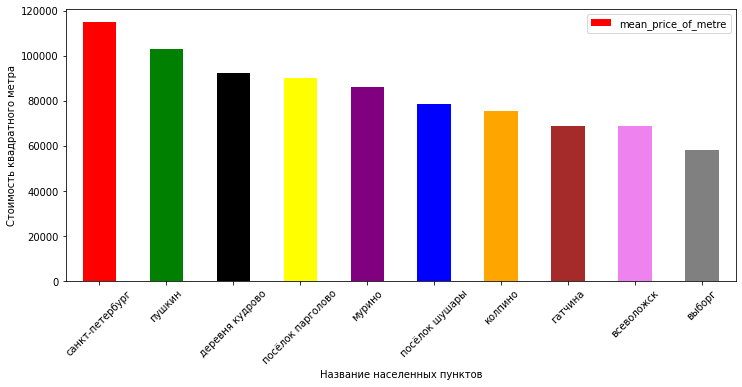

In [206]:
colors = ['red', 'green', 'black', 'yellow', 'purple', 'b', 'orange', 'brown', 'violet', 'gray']
pivot_table_metre.plot(kind='bar', y='mean_price_of_metre', rot=45, figsize=(12,5), color=colors)
plt.xlabel('Название населенных пунктов')
plt.ylabel('Стоимость квадратного метра')
plt.show()

**Вывод:** по всем выведенным данным мы можем понять, что самое большое количество объявлений о продаже квартир в Санкт-Петербурге. Там же и стоимость квадратного метра дороже, чем в других населенных пунктах.

#### Как стоимость квартир в Санкт-Петербурге зависит от расстояния до центра города.

1. Создадим таблицу, в которой будут только значения связанные с Санкт-Петербургом. 

In [207]:
group_spb = data[['locality_name', 'distance_city_center_km','total_area', 'last_price']]
group_spb = group_spb.query('locality_name == "санкт-петербург"')
group_spb = group_spb.dropna(subset=['distance_city_center_km'])
group_spb

,locality_name,distance_city_center_km,total_area,last_price
0,санкт-петербург,16.0,108.00,13000000
2,санкт-петербург,14.0,56.00,5196000
3,санкт-петербург,7.0,159.00,64900000
4,санкт-петербург,8.0,100.00,10000000
7,санкт-петербург,12.0,71.60,7915000
...,...,...,...,...
23689,санкт-петербург,16.0,35.30,3550000
23690,санкт-петербург,6.0,52.00,5500000
23691,санкт-петербург,4.0,72.90,9470000
23694,санкт-петербург,4.0,133.81,9700000


2. Выведем boxplot, с помощью которого мы увидим размах значений в столбце 'distance_city_center_km'.

<AxesSubplot:>

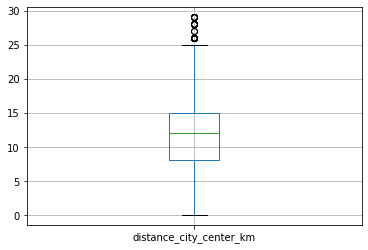

In [208]:
group_spb.boxplot(column=('distance_city_center_km'))

**Вывод:** по выведенному 'ящику с усами', мы видим, что преимущественно квартиры расположены в радиусе 25 км. от центра.

3. Удалим выбросы с помощью среза, чтобы анализ был качественней. Значения, которые больше 25 км. - удалим.

In [209]:
group_spb = group_spb.query('distance_city_center_km < 25')

4. Выведем корректный boxplot.

<AxesSubplot:>

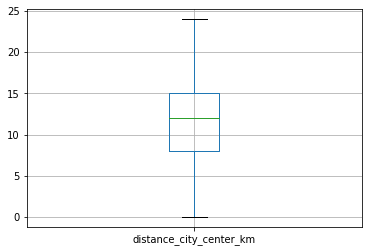

In [210]:
group_spb.boxplot(column=('distance_city_center_km'))

5. Посчитаем среднюю цену каждого километра.

In [211]:
mean_price_per_km = group_spb['last_price'].sum()/group_spb['distance_city_center_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_price_per_km))

Средняя цена для каждого километра составляет 700005 ₽


**Вывод:** по выведенным данным мы можем сделать вывод, что стоимость каждого километра составляет 700005 рублей.

6. Выведем график, который будет показывать распределение средней стоимости квартиры и расстояние квартиры от центра.

Text(0, 0.5, 'Средняя стоимость квартиры')

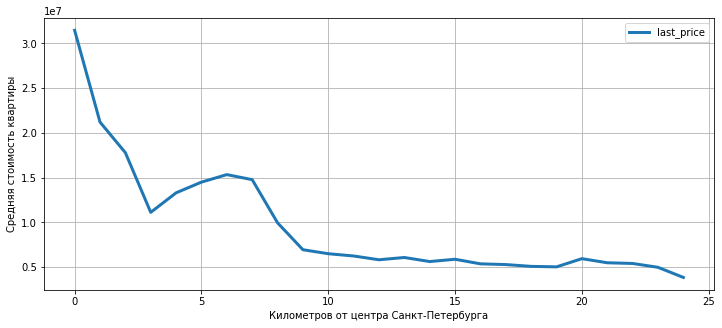

In [212]:
pivot_price_km = pd.pivot_table(group_spb, index='distance_city_center_km', values='last_price', aggfunc='mean')
pivot_price_km.plot(grid=True, figsize=(12,5), linewidth=3)
plt.xlabel('Километров от центра Санкт-Петербурга')
plt.ylabel('Средняя стоимость квартиры')

**Вывод:** по выведенному графику видно, чем дальше квартира расположена от центра, тем цена на неё ниже. Также, можно сделать вывод, центральный район Санкт-Петербурга расположен в диапозоне 10 километров.

### Общий вывод

**1. Входе исследования данных, связанных с объявлениями о недвижимости была проделана большая работа:**

- В первую очередь мы предобработали все данные в исходной таблице. Были заменены / удалены пропуски, аномалии и явные / неявные дубликаты. В тех столбцах, в которых возможно, были изменены типы данных. Также, были замечены столбцы, в которых, есть ошибки в данных из-за человеческого фактора, об этом нужно сообщить разработчикам, которые дали нам эти данные. 


- Мы посчитали и добавили в таблицу новые столбцы, а именно: цена одного квадратного метра, день недели публикции объявления, разделили дату на несколько столбцов (день, месяц, год), вывели тип этажа (первый, последний, другой) и перевели расстояние до центра города в километры. Все новые столбцы, нам пригодились в дальнейшем для анализа.

**2. Анализ корректных данных:**

- На основе корректных данных у нас есть общее представление о квартирах, которые продаются на Яндекс.Недвижимости: в среднем площадь квартиры составляет от 40-50 м^2., жилая площадь составляет 25-35 м^2, площадь кухни около 10 м^2, стоимость квартиры в среднем около 4.000.000 рублей, чаще всего в объявлениях встречаются однокомнатные или двухкомнатные квартиры, высота потолков составляет в среднем 2.65 метра, этаж квартиры в среднем: 1-3, тип этажа квартиры: другой, общее количество этаже в доме в среднем: ±5, расстояние от центра города: 10-15 км., расстояние до ближайшего аэропорта в среднем: 20-30 км., расстояние до ближайшего парка в среднем: 500 м., чаще всего объявления с продажей квартиры публикуются по будням.


**3. На основе корректных данных, изучили гипотезы:**

- **Как быстро продавались квартиры?** 
  - После проведенного анализа мы пришли к выводу, что в среднем квартира продаётся за 2 месяца. Продажу квартиры можно назвать быстрой - если квартира была куплена меньше, чем за 1 месяц. Необычно долгими по продаже квартиры, можно назвать те, которые продавались дольше 260 дней (больше 8 месяцев).


- **Какие факторы больше всего влияют на общую стоимость недвижимости?** 

    Больше всего на стоимость квартиры влияют такие факторы, как: 
  - Общая площадь квартиры: известно, чем больше м^2, тем цена выше.
  - Количество комнат.
  - Дата публикации объявления (день, месяц, год): цена на квартиры в разные периоды времени меняется в зависимости от спроса, который также варьируется.
 
 
- **Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?**
  - Самое большое количество объявлений о продаже квартир в Санкт-Петербурге. Там же и стоимость квадратного метра дороже всего - 114849 рублей за м^2. Самое минимальное количество объявлений из топ 10 населенных пунктов выборки в городе Выборг, там в среднем стоимость квадратного метра составляет около 58000 рублей.


- **Как стоимость квартир в Санкт-Петербурге зависит от расстояния до центра города?**
 - Центральный район Санкт-Петербурга расположен в диапозоне 10 километров. Чем дальше квартира расположена от центра, тем цена на неё ниже.
